In [ ]:
#import data
from sklearn.datasets import fetch_california_housing
#imort library
import pandas as pd
#loading the data
california = fetch_california_housing()
#convert to a pandas dataframe
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['target'] = california.target
df.describe()#statistics

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
import numpy as np
df.loc[100:120,'AveRooms'] = np.nan
df.loc[10:50,'HouseAge'] = np.nan
df.isnull().sum()

,0
MedInc,0
HouseAge,41
AveRooms,21
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


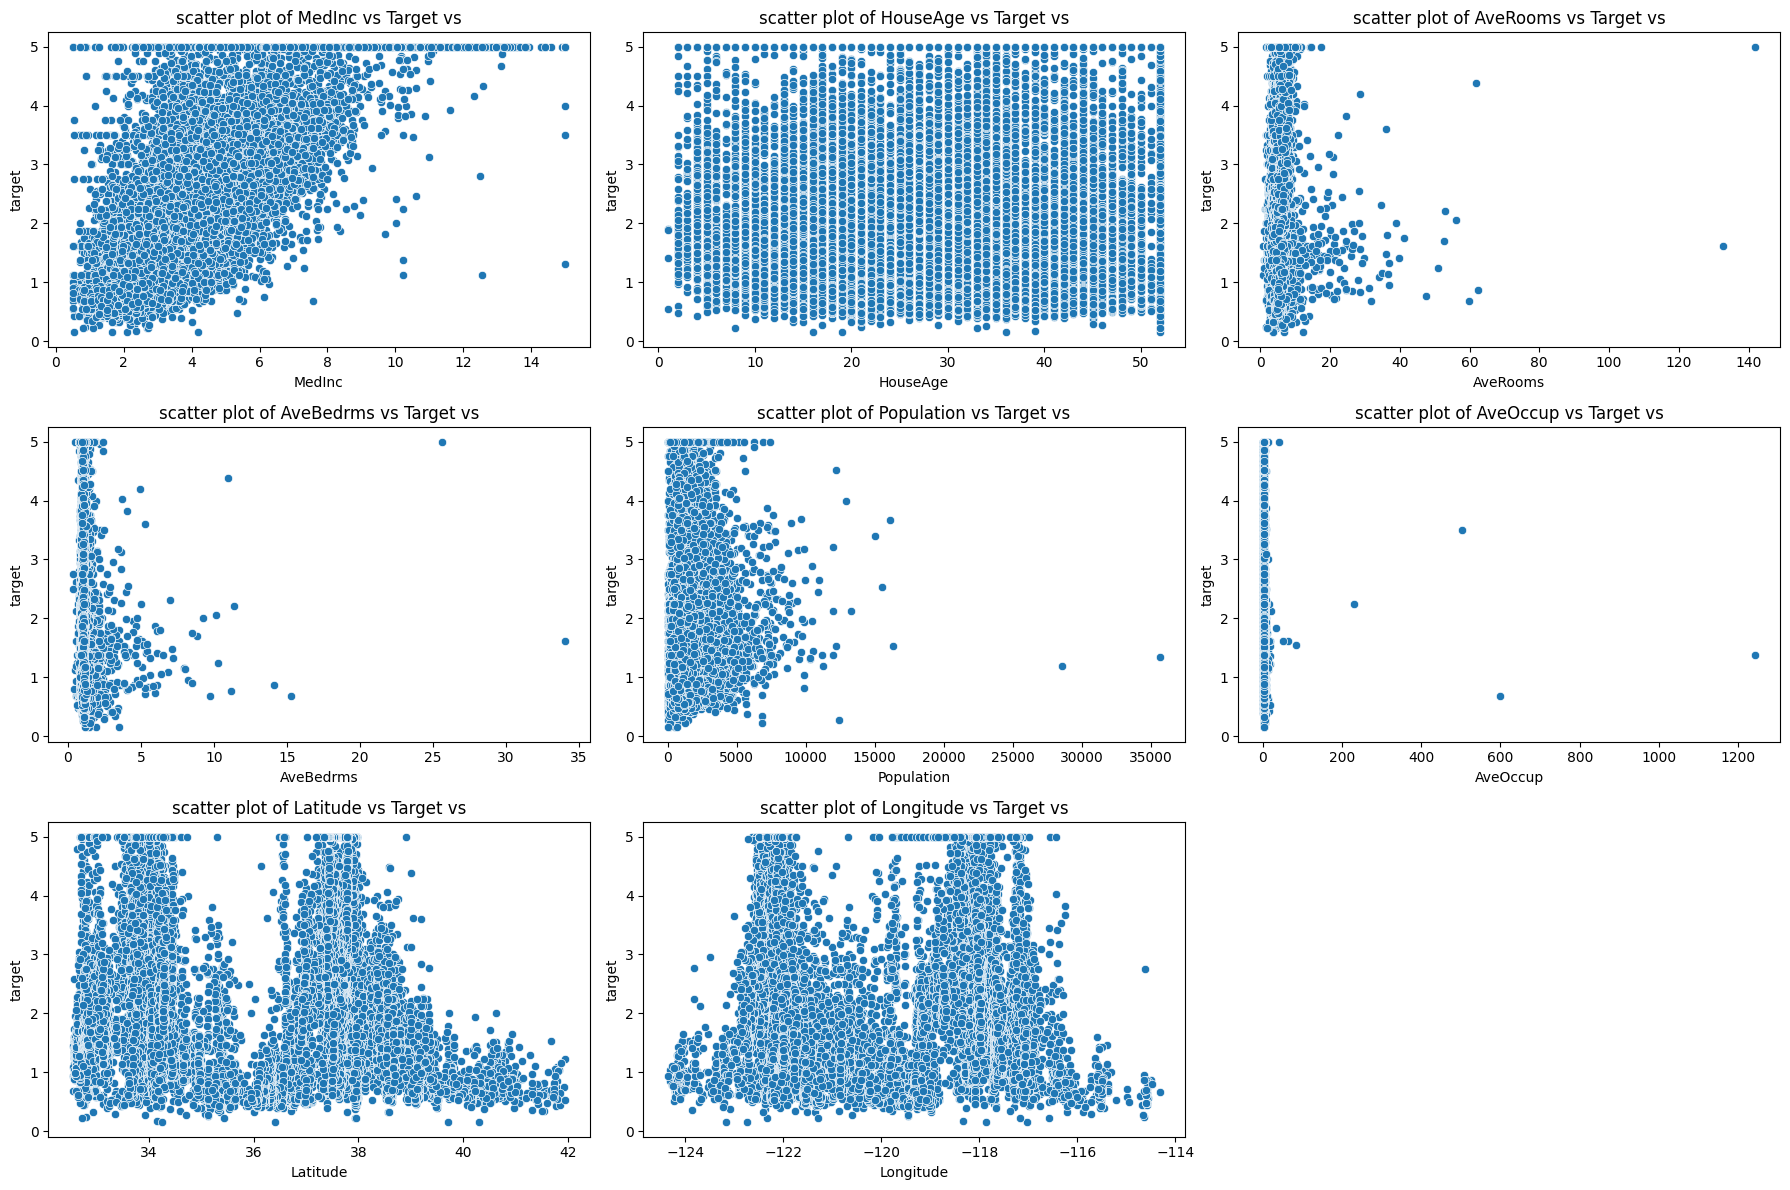

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
label=df['target']
for i, feature in enumerate(df.columns[:-1],1):
  plt.subplot(3,3,i)
  sns.scatterplot(x=df[feature], y=label)
  plt.title(f'scatter plot of {feature} vs Target vs')
plt.tight_layout()
plt.show()

In [ ]:
#handling null values
df.dropna(inplace=True)
df.isnull().sum()
df.fillna(df.median(),inplace=True)
df.ffill(inplace=True)
df.bfill(inplace=True)
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [ ]:
X=df.drop('target',axis=1)
X.shape
y=df['target']
X.shape, y.shape

((20578, 8), (20578,))

In [ ]:
#data preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[ 2.34200646  0.98861785  0.62676775 -0.1537089  -0.97472659 -0.04978391
   1.05575531 -1.33350911]
 [ 2.32948292 -0.60406205  0.32557969 -0.26312597  0.85944051 -0.09263567
   1.04639067 -1.32851171]
 [ 1.78013105  1.8645918   1.15325184 -0.04912167 -0.82121766 -0.02606529
   1.04170834 -1.33850651]
 [ 0.93068783  1.8645918   0.15569058 -0.04993702 -0.76651907 -0.05051558
   1.04170834 -1.34350392]
 [-0.01483934  1.8645918   0.34322979 -0.03303486 -0.76034342 -0.08574947
   1.04170834 -1.34350392]]


In [ ]:
#model selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (16462, 8)
X_test shape: (4116, 8)


In [ ]:
#model fit
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#evaluation
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5276509192345066


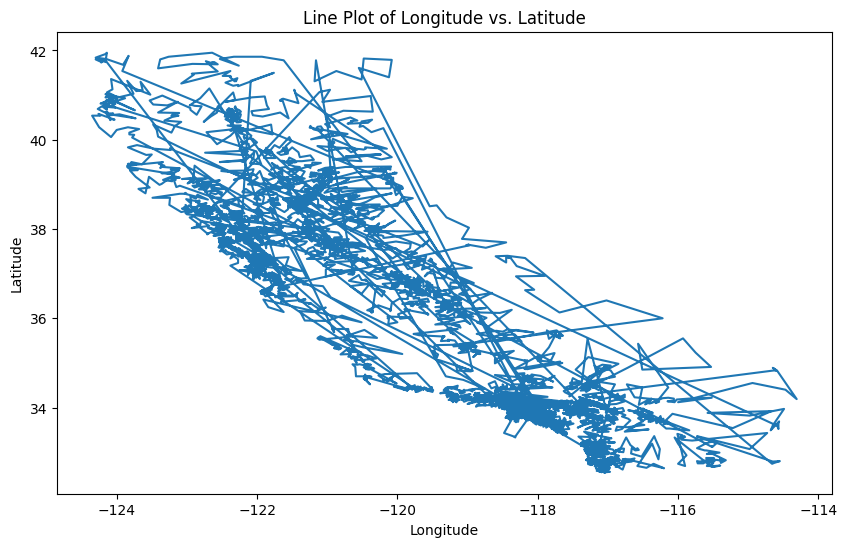

In [ ]:
# generate a line plot for Longitude and Latitude
plt.figure(figsize=(10, 6))
plt.plot(df['Longitude'], df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Line Plot of Longitude vs. Latitude')
plt.show()



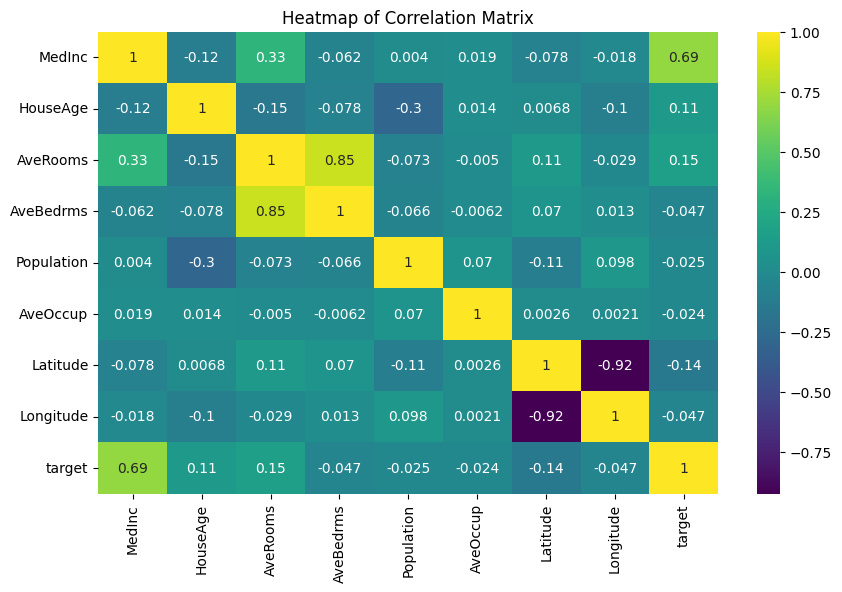

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Heatmap of Correlation Matrix')
plt.show()